#  A Highly Scientific Analysis of NYC Chinese Restaurant Names

In [389]:
import pandas as pd

In [390]:
header_list = ["restaurant_names"]

In [391]:
df = pd.read_csv("C:\\Users\\riley\\OneDrive\\Desktop\\Data Portfolio Project\\a_highly_scientific_analysis_of_chinese_restaurant_names\\restaurant_names.csv",names=header_list)

In [392]:
df.head()

restaurant_names
0                     namesAsian Cafe
1               Saketumi Asian Bistro
2                            Buddakan
3  Nan Xiang Xiao Long Bao - Flushing
4                              Nyonya

In [393]:
df.loc[0]

restaurant_names    namesAsian Cafe
Name: 0, dtype: object

In [394]:
df.loc[0] = "Asian Cafe"

In [395]:
df_2 = pd.read_csv("C:\\Users\\riley\\OneDrive\\Desktop\\Data Portfolio Project\\a_highly_scientific_analysis_of_chinese_restaurant_names\\restaurant_names_2.csv",names=header_list)

In [396]:
df.value_counts().head(10)

restaurant_names                  
3 Times                               21
Lucky Chen                            16
Old Captain Dumpling                  10
Asian Cafe                             8
Song’s Dumplings Cafe                  6
Ma LaLa                                5
Cheng Du Chinese Cuisine               5
Taste of China                         3
Han Dynasty                            3
Nan Xiang Xiao Long Bao - Flushing     2
dtype: int64

In [397]:
df.shape

(312, 1)

In [398]:
df_2.shape

(312, 1)

In [399]:
df_2.head()

restaurant_names
0  namesM Shanghai Bistro & Garden
1                    Dumpling Town
2                 Shu Jiao Fu Zhou
3                   Joe’s Shanghai
4                    Wah Fung No 1

In [400]:
df_2.loc[0] = "M Shanghai Bistro & Garden"

In [401]:
df_concat = pd.concat([df,df_2], axis=0)

In [402]:
df_concat.shape

(624, 1)

In [403]:
df_unique = df_concat.drop_duplicates()

In [404]:
df_unique.shape

(369, 1)

In [405]:
df_unique.value_counts()

restaurant_names     
3 Times                  1
New Peking               1
Noodle Village           1
Noodle Fun               1
No.1 China Garden        1
                        ..
Han Dynasty              1
Gum How Kitchen          1
Green Leaf               1
Great Wall Restaurant    1
Zou’s                    1
Length: 369, dtype: int64

In [406]:
df_unique

restaurant_names
0                            Asian Cafe
1                 Saketumi Asian Bistro
2                              Buddakan
3    Nan Xiang Xiao Long Bao - Flushing
4                                Nyonya
..                                  ...
303                                Milu
305             Golden House Restaurant
307                         Jade Garden
309                          Great Wall
310              East Season Restaurant

[369 rows x 1 columns]

In [407]:
df_unique.to_csv('unique_restaurant_names.csv')

In [408]:
words = df_unique['restaurant_names'].str.split(' ', expand=True)
words = words.stack().reset_index(level=1, drop=True).rename('word')

In [409]:
words.value_counts()

Restaurant    54
Chinese       35
Kitchen       31
House         23
New           22
              ..
Big            1
Chalong        1
Cheong         1
Cottage        1
Season         1
Name: word, Length: 486, dtype: int64

In [410]:
word_count_df = pd.DataFrame(words.value_counts())

In [411]:
len(word_count_df)

486

In [412]:
word_count_df.reset_index(inplace=True)

In [413]:
word_count_df.columns = ['word', 'count']

In [414]:
len(word_count_df)

486

In [415]:
char_list = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '+', '~', 
'/', '\\', '{', '}', '[', ']', ';', ':', '"', "'", ',', '<', '>', '.', '?', 'the','to','To' ,'On','The','of', 'Of', 'And', 'and', 'by', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '21', '95', '99', 'A', 'a']

In [416]:
import re

In [417]:
word_count_df = word_count_df[~word_count_df['word'].isin(char_list)]

In [418]:
word_count_df['percent_of_words'] = word_count_df['count']/sum(word_count_df['count'])



In [419]:
word_count_df['percent_of_restaurants'] = word_count_df['count']/len(df_unique)

In [420]:
fifty_family_names = ['Wang', 'Li', 'Zhang', 'Liu', 'Chen', 'Yang', 
'Huang', 'Zhao', 'Wu', 'Zhou', 'Xu', 'Sun', 'Ma', 'Luo', 'Gao', 'He', 
'Zhang', 'Lin', 'Zhu', 'Jiang', 'Ye', 'Qian', 'Feng', 'Cao', 'Cui', 'Wen', 
'Cheng', 'Dai', 'Dong', 'Hu', 'Ji', 'Han', 'Guan', 'Ou', 'Qian', 'Qin', 
'Song', 'Su', 'Tang', 'Tian', 'Wei', 'Xia', 'Yan', 'Ye', 'Yuan', 'Yue', 
'Zhang', 'Zheng', 'Zhu', 'Zou',"Wang", "Li", "Zhang", "Liu", "Chen", "Yang", 
"Huang", "Zhao", "Zhou", "Wu", "Xu", "Sun", "Ma", "Hu", "Guan", "He", 
"Zhang", "Lin", "Qiu", "Lou", "Zhu", "Gao", "Xu", "Li", "Hu", "Gu", "Zhong", "Song", 
"Wei", "Feng", "Lv", "Cheng", "Ye", "Luo", "Cai", "Liang", "Jia", "Jiang", "Deng", "Tan", 
"Xu", "Pang", "Fang", "Mo", "Zhao", "Yan", "Tu", "Qiao", "Li",
"Shi", "Han", "Jiang", "Shen", "Tang", "Cao", "Zheng", "Qian", "Xu", "Wei", "Hong", 
"Jia", "Yu", "Mao", "Su", "Sun", "Du", "Xiong", "Zhu", "Bai", "Ma", "Yin", "Ao", "Guo", "Xie", "Xue", "Chang", "Ke", "Ye", "Gu", "Yu",
 "Pan", "Cui", "Qin", "Xie", "Ding", "Zhou", "Hu", "Zhang", "Wu", "Ye", "Ge", "Luo", "Lei", "Geng", "Yuan"]

In [421]:
chinese_restaurant_animals = ['Phoenix', 'Dragon', 'Tiger', 'Dragonfly', 'Elephant', 
'Fish', 'Panda', 'Crane', 'Lion', 'Turtle', 'Swan', 'Shark', 'Cat', 'Rabbit', 'Horse', 
'Snake', 'Frog', 'Rooster', 'Duck', 'Fox', 'Stork', 'Peacock', 'Monkey', 'Wolf', 'Lamb', 
'Antelope', 'Swallow', 'Sparrow', 'Bat', 'Deer', "Hen", 'Bull', 'Cow', 'Pig', 'Bird']

In [422]:
chinese_city_names = ['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Chongqing', 'Tianjin', 
'Wuhan', 'Hangzhou', 'Chengdu', 'Nanjing', "Xi'an", 'Fuzhou', 'Xiamen', 'Qingdao', 'Shenyang', 
'Suzhou', 'Zhengzhou', 'Dalian', 'Changsha', 'Nanchang', 'Kunming', 'Guilin', 'Shantou', 
'Zhongshan', 'Taizhou', 'Wuxi', 'Zibo', 'Hohhot', 'Yantai', 'Hefei', 'Jinan', 'Huizhou', 
'Changzhou', 'Urumqi', 'Harbin', 'Weifang', 'Jiaxing', 'Baotou', 'Lanzhou', 'Ningbo',
'Taiyuan', 'Jilin', 'Luoyang', 'Datong', 'Linyi', 'Xining']

In [423]:
chinese_restaurant_foods = ['Wonton','Roll','Noodle','Noodles','Apricot' 'Dumpling', 'Dumplings','Dim Sum', 'Pot',
'Mapo', 'Tofu', 'Chow Mein', 'Spring Roll', 'Sweet and Sour', 'Kung Pao Chicken', 
'Beef and Broccoli', 'Egg Foo Young', 'Egg', 'Rolls', 'Wonton', 'Pot Sticker', 
'Chicken and Cashews', "General Tso's Chicken", 'Cashew Chicken', 'Chow Fun', 
'Beef and Snow Peas', 'Orange Chicken', 'Mongolian Beef', 'Eggplant in Garlic Sauce', 
'Szechuan Chicken', 'Pork Fried Rice', 'Beef Chow Mein', 'Broccoli and Beef', 'Pepper Steak', 
'Garlic Chicken', 'Teriyaki', 'Chicken', 'Mu Shu Pork', 'Moo Goo Gai Pan', 'Crab', 'Rangoon', 
'Lo Mein', 'Peking,' ,'Duck', 'Beef and Broccoli', 'Shrimp', 'Fried' ,'Rice', 'Sesame', 
'Egg Drop Soup', 'Chicken and Broccoli', 'Baozi', 'Bao', 'Miso', 'Soup','noodles', 'Spice','Chai','Nut', "Rangoon", 'Apple','CHILI', 
'Chili' 'Food', 'Mayo', 'Cuisine', 'Food', 'Lichee', 'Burger', 'Soup']

In [424]:
import re

In [425]:
word_count_df.sort_values(by='count', ascending=False).head(30)

word  count  percent_of_words  percent_of_restaurants
0   Restaurant     54          0.055215                0.146341
1      Chinese     35          0.035787                0.094851
2      Kitchen     31          0.031697                0.084011
3        House     23          0.023517                0.062331
4          New     22          0.022495                0.059621
5       Garden     18          0.018405                0.048780
6        China     18          0.018405                0.048780
7       Noodle     13          0.013292                0.035230
8       Golden     12          0.012270                0.032520
9     Shanghai     12          0.012270                0.032520
11         Wok     10          0.010225                0.027100
13        King      9          0.009202                0.024390
15    Dumpling      9          0.009202                0.024390
16       Asian      8          0.008180                0.021680
19      Dragon      7          0.007157                0.018970
18      Palace      7          0.007157                0.018970
20        Food      6          0.006135                0.016260
21       Lucky      6          0.006135                0.016260
22       Yummy      6          0.006135                0.016260
23     Cuisine      6          0.006135                0.016260
24         Wah      6          0.006135                0.016260
25       Taste      6          0.006135                0.016260
26     Village      6          0.006135                0.016260
34        Hong      5          0.005112                0.013550
40          Fu      5          0.005112                0.013550
39    Szechuan      5          0.005112                0.013550
38        Good      5          0.005112                0.013550
37        East      5          0.005112                0.013550
36     Express      5          0.005112                0.013550
35         Lee      5          0.005112                0.013550

In [426]:
import re
import numpy as np

In [427]:
precious_metals = ["Gold", "Silver", "Platinum", "Diamond", "Jade", "Ruby", 
                   "Sapphire", "Emerald", "Opal", "Amethyst", "Topaz",
                     "Aquamarine", "Tourmaline", "Garnet", "Citrine", 
                     "Peridot", "Zircon", "Tanzanite", "Turquoise", "Moonstone", 
                     "Onyx", "Jade", "Iolite", "Spinel", "Lapis Lazuli", "Malachite"]

In [428]:
chinese_provinces_list = ["Anhui", "Beijing", "Chongqing", "Fujian", "Gansu", "Guangdong", "Guangxi", "Guizhou", "Hainan", "Hebei", "Heilongjiang", 
                          "Henan", "Hubei", "Hunan", "Jiangsu", "Jiangxi", "Jilin", "Liaoning", "Qinghai", "Shaanxi", "Shandong", "Shanghai", 
                          "Shanxi", "Sichuan", "Tianjin", "Tibet", "Xinjiang", "Yunnan", "Zhejiang"]

In [429]:
tastes = ['Sweet', 'Sour', 'Spicy', 'Salty', 'Bitter', 'Tasty', "Taste", 'Hot', 'Cold', 'Silky', 'Yum', 'Fresh', 'Delicious', 'Excellent', 'Good', 'Yummy' ]

In [430]:
sun_moon = ['Sun', 'Moon']

In [431]:
old_new = ['Old', 'New']

In [432]:
direction_list = ['North', 'South', 'East', 'West', 'Southeast', 'Southwest', 'Northeast', 'Northwest', 'Central']

In [433]:
places_list = ['Restaurant', 'Bar', 'Kitchen', 'Bistro' 'Lounge', 'Harbor','House', 'Garden', 'Room', 'Village', 'City', 'Town', 'Eatery', 'Home', 'Diner', 'house', 'Eatery', 'Pub', 'Bistro', 'Alley', 'Forest', 'Orchard']

In [434]:
royalty_list = ['King','Queen','Prince', 'Princess', 'Emperor', 'Grand' , 'Fortune', 'Great','Empire', 'Royal', 'Dynasty', 'Crown', 'Palace', 'Noble', 'Empress', 'Imperial']

In [435]:
word_count_df.sort_values(by='count', ascending=False).head(30)

word  count  percent_of_words  percent_of_restaurants
0   Restaurant     54          0.055215                0.146341
1      Chinese     35          0.035787                0.094851
2      Kitchen     31          0.031697                0.084011
3        House     23          0.023517                0.062331
4          New     22          0.022495                0.059621
5       Garden     18          0.018405                0.048780
6        China     18          0.018405                0.048780
7       Noodle     13          0.013292                0.035230
8       Golden     12          0.012270                0.032520
9     Shanghai     12          0.012270                0.032520
11         Wok     10          0.010225                0.027100
13        King      9          0.009202                0.024390
15    Dumpling      9          0.009202                0.024390
16       Asian      8          0.008180                0.021680
19      Dragon      7          0.007157                0.018970
18      Palace      7          0.007157                0.018970
20        Food      6          0.006135                0.016260
21       Lucky      6          0.006135                0.016260
22       Yummy      6          0.006135                0.016260
23     Cuisine      6          0.006135                0.016260
24         Wah      6          0.006135                0.016260
25       Taste      6          0.006135                0.016260
26     Village      6          0.006135                0.016260
34        Hong      5          0.005112                0.013550
40          Fu      5          0.005112                0.013550
39    Szechuan      5          0.005112                0.013550
38        Good      5          0.005112                0.013550
37        East      5          0.005112                0.013550
36     Express      5          0.005112                0.013550
35         Lee      5          0.005112                0.013550

In [436]:
word_count_df['category'] = np.where(word_count_df['word'].str.contains('|'.join(chinese_restaurant_foods), re.I, regex=True),'food', 
np.where(word_count_df['word'].isin(fifty_family_names), 'family name', 
np.where(word_count_df['word'].str.contains('|'.join(royalty_list), re.I, regex=True), 'royalty', 
np.where(word_count_df['word'].isin(chinese_restaurant_animals), 'animals', 
np.where(word_count_df['word'].str.contains('|'.join(tastes),re.I, regex=True), 'tastes', 
np.where(word_count_df['word'].str.contains('|'.join(precious_metals),re.I, regex=True), 'precious metal',
np.where(word_count_df['word'].str.contains('|'.join(places_list), re.I, regex=True), 'places',
np.where(word_count_df['word'].str.contains('|'.join(direction_list), re.I, regex=True), 'direction',
np.where(word_count_df['word'].str.contains('|'.join(chinese_provinces_list), re.I, regex=True), 'province', 'other')))))))))


In [437]:
word_count_df = word_count_df.reset_index()

In [438]:
word_count_df.drop(columns='index',axis=0)

word  count  percent_of_words  percent_of_restaurants category
0    Restaurant     54          0.055215                0.146341   places
1       Chinese     35          0.035787                0.094851    other
2       Kitchen     31          0.031697                0.084011   places
3         House     23          0.023517                0.062331   places
4           New     22          0.022495                0.059621    other
..          ...    ...               ...                     ...      ...
465         Big      1          0.001022                0.002710    other
466     Chalong      1          0.001022                0.002710    other
467      Cheong      1          0.001022                0.002710    other
468     Cottage      1          0.001022                0.002710    other
469      Season      1          0.001022                0.002710    other

[470 rows x 5 columns]

In [439]:
drop_hanzi = word_count_df['word'].sort_values( ascending=False).head(10)

In [440]:
drop_hanzi = drop_hanzi.to_numpy()

In [441]:
word_count_df = word_count_df[~word_count_df['word'].str.contains('|'.join(drop_hanzi))]

In [442]:
word_count_df.to_csv("nyc_chinese_restaurant_data_clean.csv")

# Vizualizations

In [443]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Word Cloud

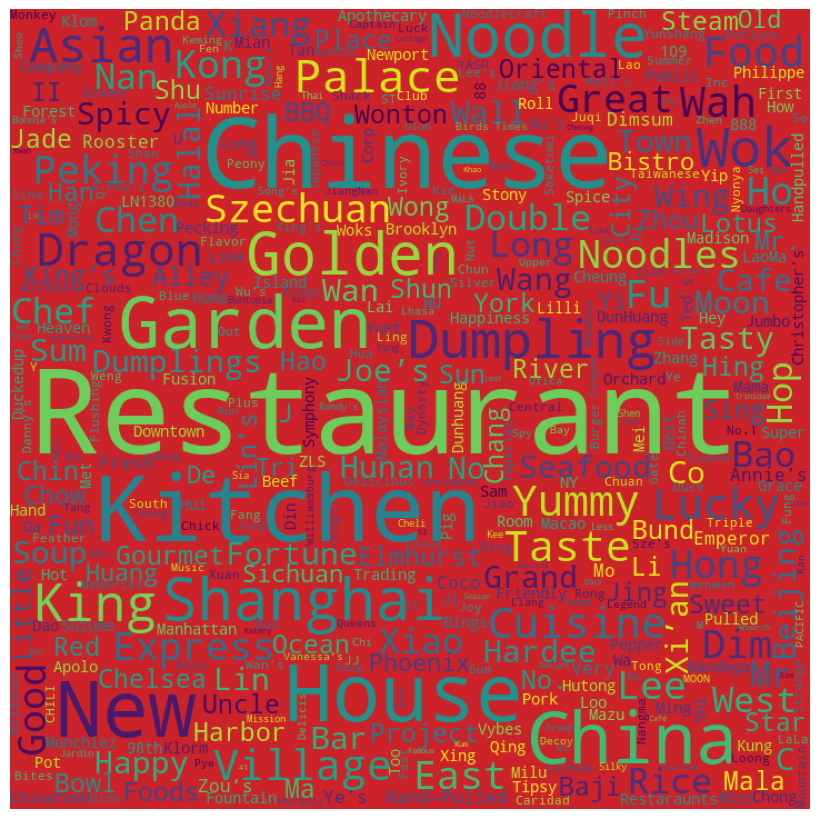

In [444]:
wordcloud=WordCloud(width=720, height=720, margin=0,background_color='#cc232a',
max_words = len(word_count_df['word'])).generate_from_frequencies(dict(zip(word_count_df['word'],
word_count_df['count'])))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(pad=0)


plt.savefig("word_cloud1.png", dpi=300)



In [445]:
word_count_df['rank'] = word_count_df['count'].rank(ascending=False)

In [446]:
word_count_df['rank'] = word_count_df['rank'].astype(int)

In [447]:
word_count_df.sort_values(by='count', ascending=False)

index        word  count  percent_of_words  percent_of_restaurants  \
0        0  Restaurant     54          0.055215                0.146341   
1        1     Chinese     35          0.035787                0.094851   
2        2     Kitchen     31          0.031697                0.084011   
3        3       House     23          0.023517                0.062331   
4        4         New     22          0.022495                0.059621   
..     ...         ...    ...               ...                     ...   
243    253          Da      1          0.001022                0.002710   
241    251        Pork      1          0.001022                0.002710   
240    250    Dunhuang      1          0.001022                0.002710   
239    249        Beef      1          0.001022                0.002710   
469    485      Season      1          0.001022                0.002710   

    category  rank  
0     places     1  
1      other     2  
2     places     3  
3     places     4  
4      other     5  
..       ...   ...  
243    other   297  
241    other   297  
240    other   297  
239    other   297  
469    other   297  

[460 rows x 7 columns]

### Circular Lollipop Plot

In [448]:
import random

In [449]:
COUNTS = word_count_df['count']

In [450]:
COUNTS = COUNTS.to_list()

In [451]:
random.seed(23)
random.shuffle(COUNTS)

In [452]:
COUNT_MIN = np.min(COUNTS)
COUNT_MAX = np.max(COUNTS)

In [453]:
len(COUNTS)

460

In [454]:
# low and high refer to the final dot size in the lolipop
def scale_to_interval(x, low=1, high=80):
    return ((x -COUNT_MIN ) / (COUNT_MAX - COUNT_MIN)) * (high - low) + low

### Basic Circular Plot

In [455]:
# Different shades of grey used in the plot
GREY88 = "#e0e0e0"
GREY85 = "#d9d9d9"
GREY82 = "#d1d1d1"
GREY79 = "#c9c9c9"
GREY97 = "#f7f7f7"
GREY60 = "#999999"

In [456]:
# values for the x axis
ANGLES = np.linspace(0, 2 * np.pi, len(COUNTS), endpoint=False)

#heights of the lines and y-position of the dot are given by the word count
HEIGHTS = np.array(COUNTS)

#category values for the colors
CATEGORY_CODES = pd.Categorical(word_count_df['category']).codes

In [457]:
word_count_df.category.value_counts()

other             352
family name        30
food               23
places             17
royalty            11
tastes             10
animals             6
province            4
direction           4
precious metal      3
Name: category, dtype: int64

In [458]:
CATEGORY_CODES

array([5, 4, 5, 5, 4, 5, 4, 3, 6, 7, 4, 8, 4, 4, 8, 0, 3, 4, 9, 3, 4, 9,
       5, 8, 4, 4, 3, 4, 4, 2, 4, 4, 1, 9, 4, 4, 4, 4, 3, 4, 4, 4, 4, 2,
       4, 4, 1, 3, 2, 9, 4, 4, 7, 4, 4, 4, 8, 5, 2, 4, 4, 7, 4, 9, 5, 4,
       4, 3, 4, 4, 4, 8, 3, 4, 4, 6, 4, 4, 2, 4, 4, 4, 4, 0, 3, 4, 4, 4,
       2, 5, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 9, 5, 4, 4, 4, 3, 2, 4, 4, 8,
       4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 0, 4, 2, 4, 4, 5,
       4, 7, 4, 4, 4, 4, 4, 9, 4, 0, 2, 4, 8, 4, 4, 4, 4, 2, 4, 2, 4, 2,
       4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 5, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3,
       4, 9, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 6, 4, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [459]:
# Colormap taken from https://carto.com/carto-colors/
COLORMAP = ["#7F3C8D","#11A579","#3969AC","#F2B701","#E73F74","#80BA5A","#E68310","#008695","#CF1C90","#f97b72","#4b4b8f","#A5AA99"]

In [460]:
# Select colors for each word according to its category.
COLORS = np.array(COLORMAP)[CATEGORY_CODES]

In [461]:
# This is going to be helpful to create some space for labels within the circle 
PLUS = 1.5

In [462]:
word_count_df.sort_values(by='count', ascending=False).head(8)

index        word  count  percent_of_words  percent_of_restaurants  \
0      0  Restaurant     54          0.055215                0.146341   
1      1     Chinese     35          0.035787                0.094851   
2      2     Kitchen     31          0.031697                0.084011   
3      3       House     23          0.023517                0.062331   
4      4         New     22          0.022495                0.059621   
5      5      Garden     18          0.018405                0.048780   
6      6       China     18          0.018405                0.048780   
7      7      Noodle     13          0.013292                0.035230   

  category  rank  
0   places     1  
1    other     2  
2   places     3  
3   places     4  
4    other     5  
5   places     6  
6    other     6  
7     food     8

In [463]:
pd.DataFrame(COUNTS).sort_values(by=0, ascending=False).head(7)

0
90   54
211  35
279  31
13   23
174  22
344  18
34   18

In [464]:
# Create a data frame with the information for the four words that are going to be labeled
LABELS_DF = word_count_df[word_count_df['count'] >= 18].reset_index()

#create labels
LABELS_DF['label'] = [
    f"{word}\nCount: {int(count)}"
    for word, count in zip(LABELS_DF['word'], LABELS_DF['count'])
]
# set position of the labels
LABELS_DF["x"] = [83, 211, 279, 13, 174, 344, 34]
LABELS_DF["y"] = [75, 54, 45, 37, 44, 23, 30]

In [465]:
LABELS_DF

level_0  index        word  count  percent_of_words  \
0        0      0  Restaurant     54          0.055215   
1        1      1     Chinese     35          0.035787   
2        2      2     Kitchen     31          0.031697   
3        3      3       House     23          0.023517   
4        4      4         New     22          0.022495   
5        5      5      Garden     18          0.018405   
6        6      6       China     18          0.018405   

   percent_of_restaurants category  rank                  label    x   y  
0                0.146341   places     1  Restaurant\nCount: 54   83  75  
1                0.094851    other     2     Chinese\nCount: 35  211  54  
2                0.084011   places     3     Kitchen\nCount: 31  279  45  
3                0.062331   places     4       House\nCount: 23   13  37  
4                0.059621    other     5         New\nCount: 22  174  44  
5                0.048780   places     6      Garden\nCount: 18  344  23  
6                0.048780    other     6       China\nCount: 18   34  30

Text(0.5, 0.02, 'Visualization by Riley Livingston - A Highly Scientific Analysis of Chinese Restaurant Names in NYC')

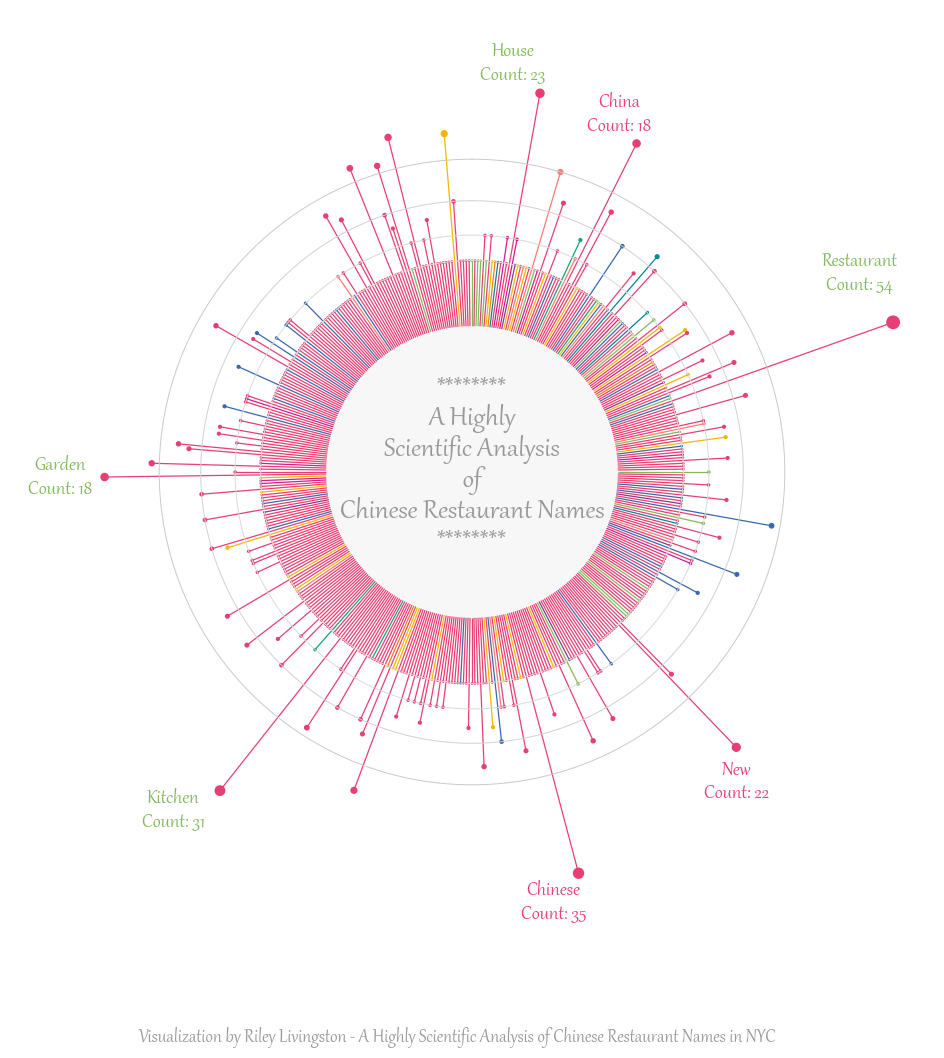

In [466]:
#initialize the layout in polar coordinates
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={"projection": "polar"})


# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Use logarithmic scale for the radial axis
ax.set_rscale('symlog')

# Angular axis starts at 90 degrees, not at 0
ax.set_theta_offset(np.pi / 2)

# Reverse the direction to go counter-clockwise.
ax.set_theta_direction(-1)

# Add lines
ax.vlines(ANGLES, 0 + PLUS, HEIGHTS + PLUS, color=COLORS, lw=0.9)

# Add dots
ax.scatter(ANGLES, HEIGHTS + PLUS, s=scale_to_interval(HEIGHTS), color=COLORS)

# remove spines for both axes
ax.spines["start"].set_color('none')
ax.spines["polar"].set_color("none")

#remove gridlines, ticks, tick labels
ax.grid(False)
ax.set_xticks([])
ax.set_yticklabels([])


# Add our custom grid lines for the radial axis.
# These lines indicate 1, 2, 4, 8 instances of the word
HANGLES = np.linspace(0, 2 * np.pi, 200)
ax.plot(HANGLES, np.repeat(1 + PLUS, 200), color= GREY88, lw=0.7)
ax.plot(HANGLES, np.repeat(2 + PLUS, 200), color= GREY85, lw=0.7)
ax.plot(HANGLES, np.repeat(4 + PLUS, 200), color= GREY82, lw=0.7)
ax.plot(HANGLES, np.repeat(8 + PLUS, 200), color= GREY79, lw=0.7)

# If you have a look at the beginning of this post, you'll see the inner circle is not white.
# This fill creates the effect of a very light grey background.
ax.fill(HANGLES, np.repeat(PLUS, 200), GREY97)

# Note the 'transform=ax.transAxes'
# It allows us to pass 'x' and 'y' in terms of the (0, 1) coordinates of the axis
# instead of having to use the coordinates of the data.
# (0.5, 0.5) represents the middle of the axis in this transformed coordinate system
ax.text(
    x=0.5, y=0.508, s="********\nA Highly\nScientific Analysis\n of \nChinese Restaurant Names\n********",
    color=GREY60, va="center", ha="center", ma="center", fontfamily="Gabriola",
    fontsize=23, fontweight="bold", linespacing=1.1, transform=ax.transAxes)


# Add labels for the five selected words
for idx, row in LABELS_DF.iterrows():
    color = COLORS[row["index"]]
    ax.text(
        x=ANGLES[row["x"]], y=row["y"], s=row["label"], color=color,
        ha="right", va="center", ma="center", size=16,
        family="Gabriola", weight="bold"
        )

fig.text(
    x=0.5, y=0.02, s="Visualization by Riley Livingston - A Highly Scientific Analysis of Chinese Restaurant Names in NYC",
    color=GREY60, fontsize=15, ha="center", fontfamily="Gabriola", fontweight="bold")


In [467]:
def circular_plot(angles, heights, colors, lw, ax):
    ax.set_facecolor("white")
    
    ax.set_rscale("symlog")
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.spines["start"].set_color("none")
    ax.spines["polar"].set_color("none")
    
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticklabels([])
    
    # The 'lw' argument controls the width of the lines. 
    # This is going to be different for the top and lower panels.
    ax.vlines(angles, 0 + PLUS, heights + PLUS, color=colors, lw=lw)
    ax.scatter(angles, heights + PLUS, s=scale_to_interval(heights), color=colors)
    
    HANGLES = np.linspace(0, 2 * np.pi, 200)
    ax.plot(HANGLES, np.repeat(1 + PLUS, 200), color= GREY88, lw=0.7)
    ax.plot(HANGLES, np.repeat(2 + PLUS, 200), color= GREY85, lw=0.7)
    ax.plot(HANGLES, np.repeat(4 + PLUS, 200), color= GREY82, lw=0.7)
    ax.plot(HANGLES, np.repeat(8 + PLUS, 200), color= GREY79, lw=0.7)

    
    ax.fill(HANGLES, np.repeat(PLUS, 200), GREY97)
    
    # Change upper limit of the radial axis so larger dots fit within the plot area
    ax.set_rmax(ax.get_rmax() * 2)
    


    

In [468]:
def map_category(category):
    """Maps Categories names to the subplots"""
    if category =='other':
        return 'Other'
    elif category == "family_name":
        return "Family\nNames"
    elif category == "place":
        return "Places"
    elif category == 'tastes':
        return 'Taste'
    elif category == "food":
        return "Food"
    elif category == "direction":
        return "Direction"
    elif category == 'precious_metal':
        return 'Precious\nMetals'
    elif category == 'royalty':
        return 'Royalty'
    elif category == 'province':
        return 'Chinese\nProvinces\n and\n Cities'
    elif category =='animal':
        return 'Animals'
    else:
        return category

In [469]:
CATEGORIES = sorted(pd.Categorical(word_count_df["category"]).unique())
LABELS = [map_category(category) for category in CATEGORIES]

In [470]:
len(COUNTS)

460

In [471]:
len(ANGLES)

460

In [472]:
len(HEIGHTS)

460

In [473]:
word_count_df = word_count_df.reset_index()

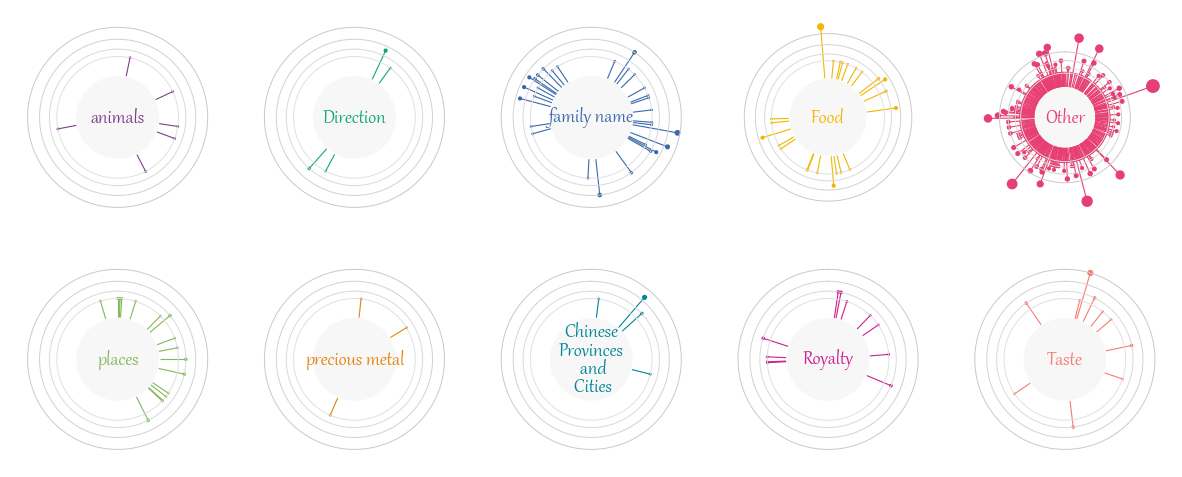

In [474]:
# The plot consists of 2 rows and 5 columns (10 categories in total)
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={"projection": "polar"})
fig.patch.set_facecolor("white")

# Define the slices used to iterate through 'axes'.
# It iterates in a rowwise manner.
# It starts in the first row, and iterates over all the columns of that row
# from left to right, then it goes to the next row and does the same.
SLICES = [(i, j) for i in range(2) for j in range(5)]


for category, label, slice_ in zip(CATEGORIES, LABELS, SLICES):
    # Select axis
    ax = axes[slice_]

    # Select indexes corresponding to the words in this category
    idx = word_count_df.index[word_count_df["category"] == category].tolist()
    
    # Subset ANGLES, HEIGHTS, and COLORS to use the ones for this category.
    angles = ANGLES[idx]
    heights = HEIGHTS[idx]
    colors = COLORS[idx]
    
    # Create circular plot
    circular_plot(angles, heights, colors, 0.8, ax)
    
    # Add text within the inner circle representing the category
    ax.text(
        x=0.5, y=0.5, s=label, color=colors[0], va="center", ha="center",
        ma="center", fontfamily="Gabriola", fontsize=16, fontweight="bold",
        linespacing=0.87, transform=ax.transAxes

    
    )


# Adjust space between subplots.
# 'wspace=0' leaves no horizontal space between subplots.
# 'hspace=0' leaves no vertical space between subplots.
fig.subplots_adjust(wspace=0.1, hspace=0.1)

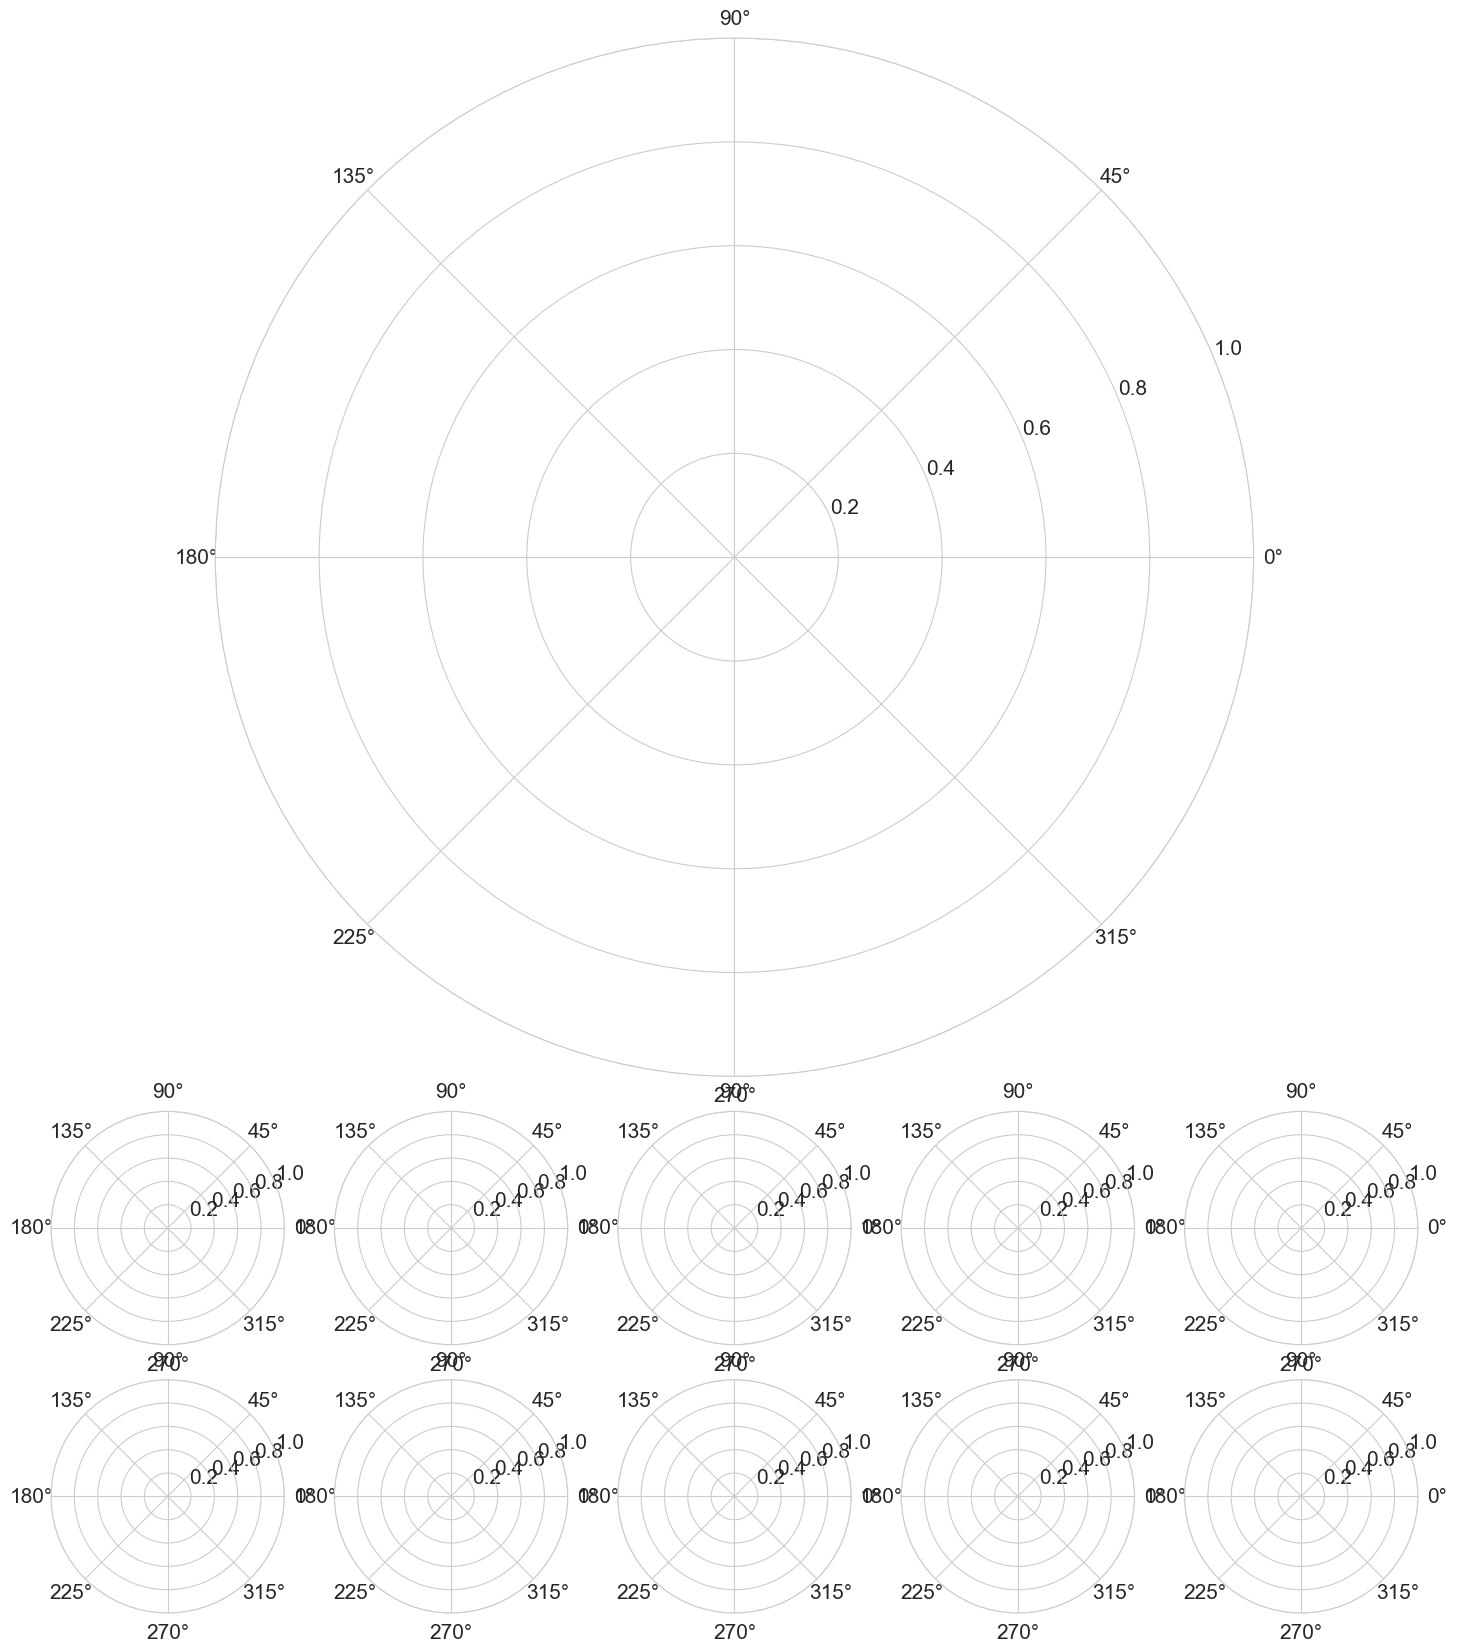

In [475]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 17.5), subplot_kw={"projection": "polar"})
fig.patch.set_facecolor("white")
gs = axes[0, 0].get_gridspec()

# Remove the underlying axes for the subplots that are going to be combined
for i in range(4):
    for j in range(5):
        axes[i, j].remove()

# Combine subplots into one larger subplot
ax_big = fig.add_subplot(
    gs[:4, :], # takes all the subplots on the first 4 rows.
    projection="polar" # indicates this big axis uses a polar projection
)

# Set its aspect to "equal" so it is centered
ax_big.set_aspect("equal")

# Adjust margin and space between subplots
fig.subplots_adjust(
    left=0.04, bottom=0.05, right=0.96, top=0.95, # margins
    wspace=0.15, hspace=.15 # spaces

)

# Final Circular Lolipop Plot

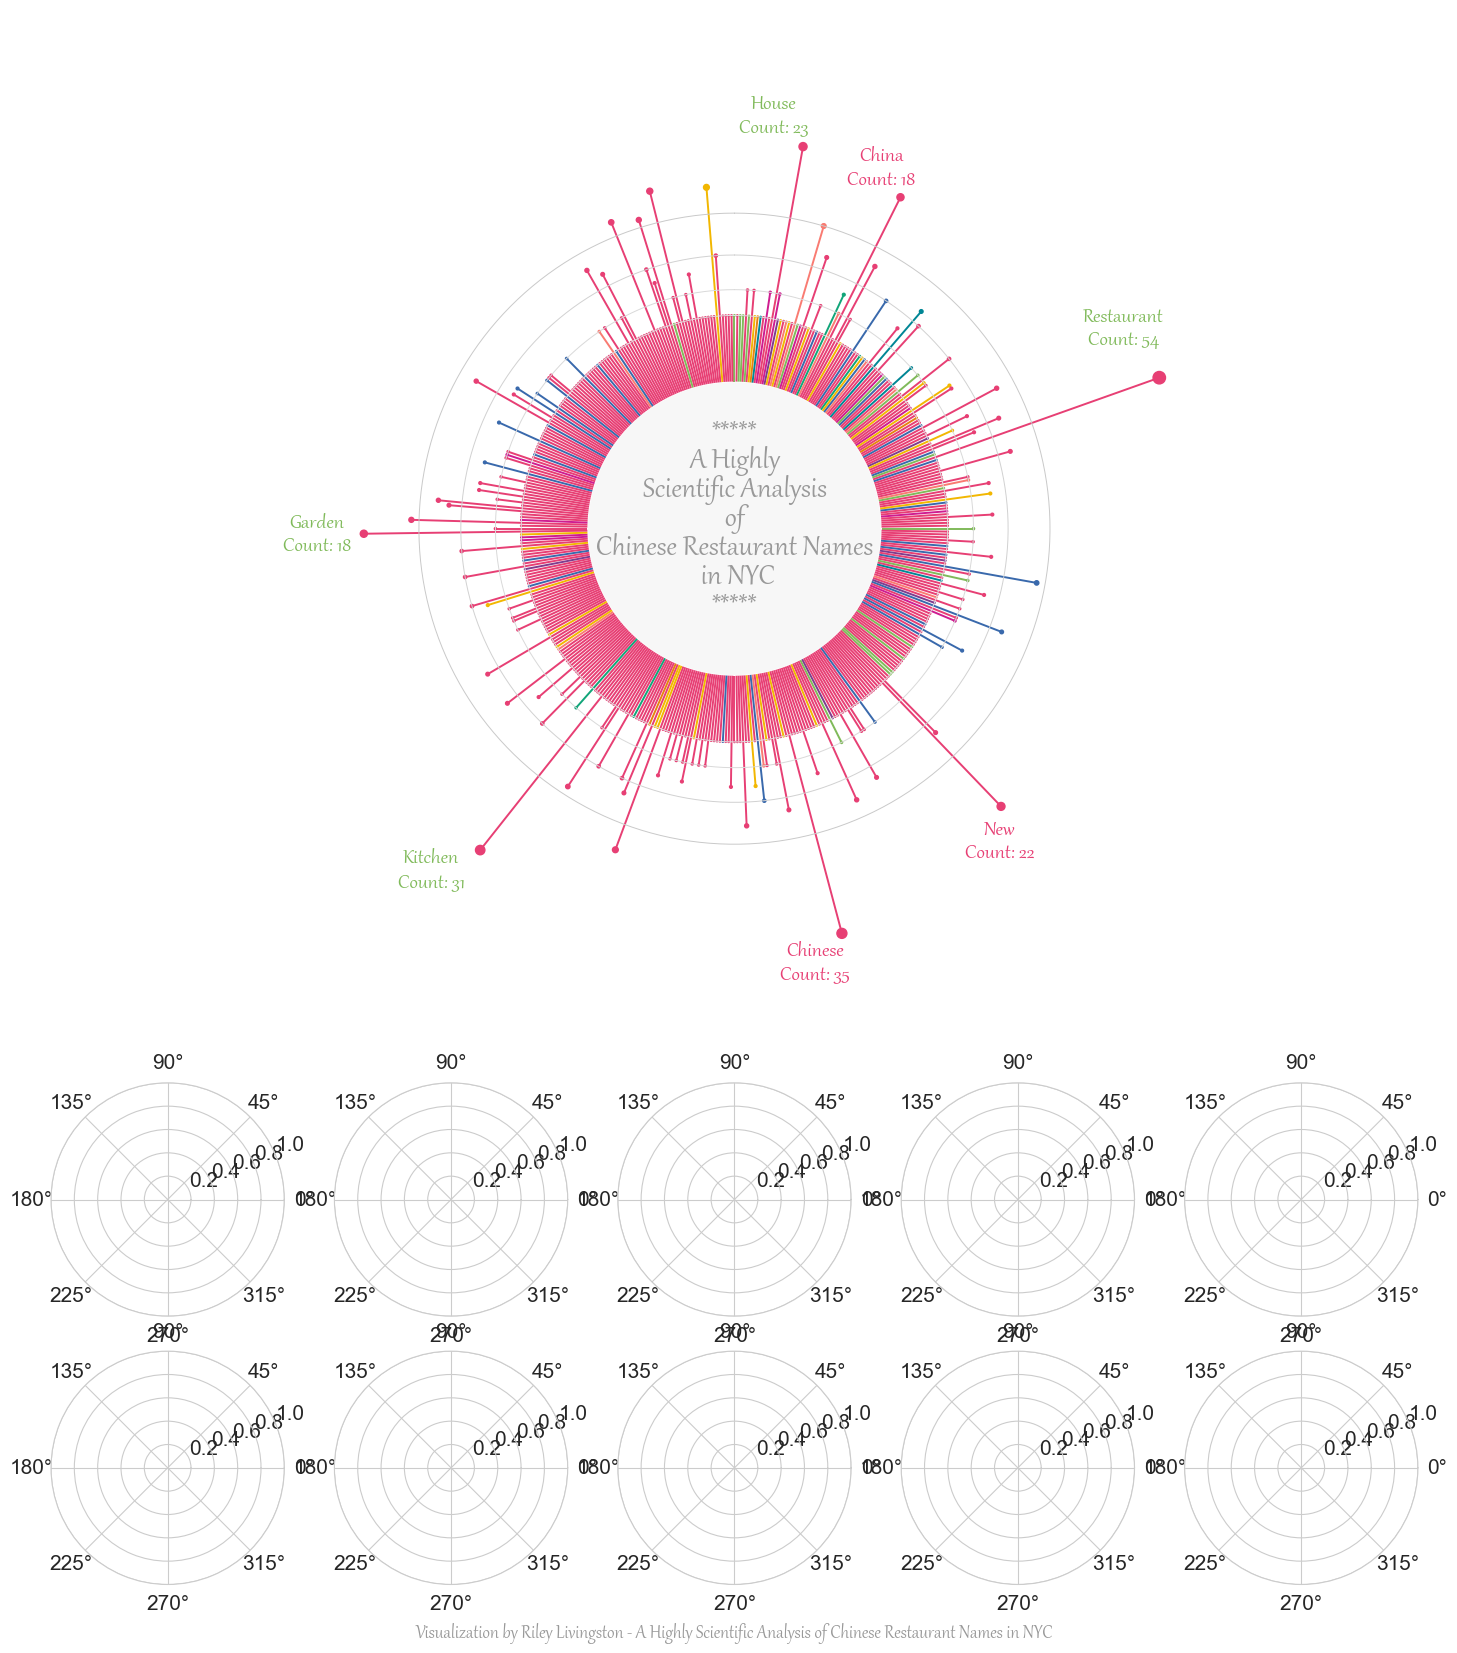

In [476]:
# Add circular plot
circular_plot(ANGLES, HEIGHTS, COLORS, 1.4, ax_big)
# Add text annotations
for idx, row in LABELS_DF.iterrows():
    color=COLORS[row["index"]]
    ax_big.text(
        ANGLES[row["x"]], row["y"], row["label"], ha="right", va="center",
        ma="center", size=17, family="Gabriola", weight="bold", color=color
    )


ax_big.text(
    x=0.5, y=0.51, s="*****\nA Highly\nScientific Analysis\n of \nChinese Restaurant Names\n in NYC\n*****",
    color=GREY60, va="center", ha="center", ma="center", fontfamily="Gabriola",
    fontsize=24, fontweight="bold", linespacing=0.95, transform=ax_big.transAxes
)
fig.text(
    x=0.5, y=0.02, s="Visualization by Riley Livingston - A Highly Scientific Analysis of Chinese Restaurant Names in NYC",
    color=GREY60, fontsize=15, ha="center", fontfamily="Gabriola", fontweight="bold")
fig

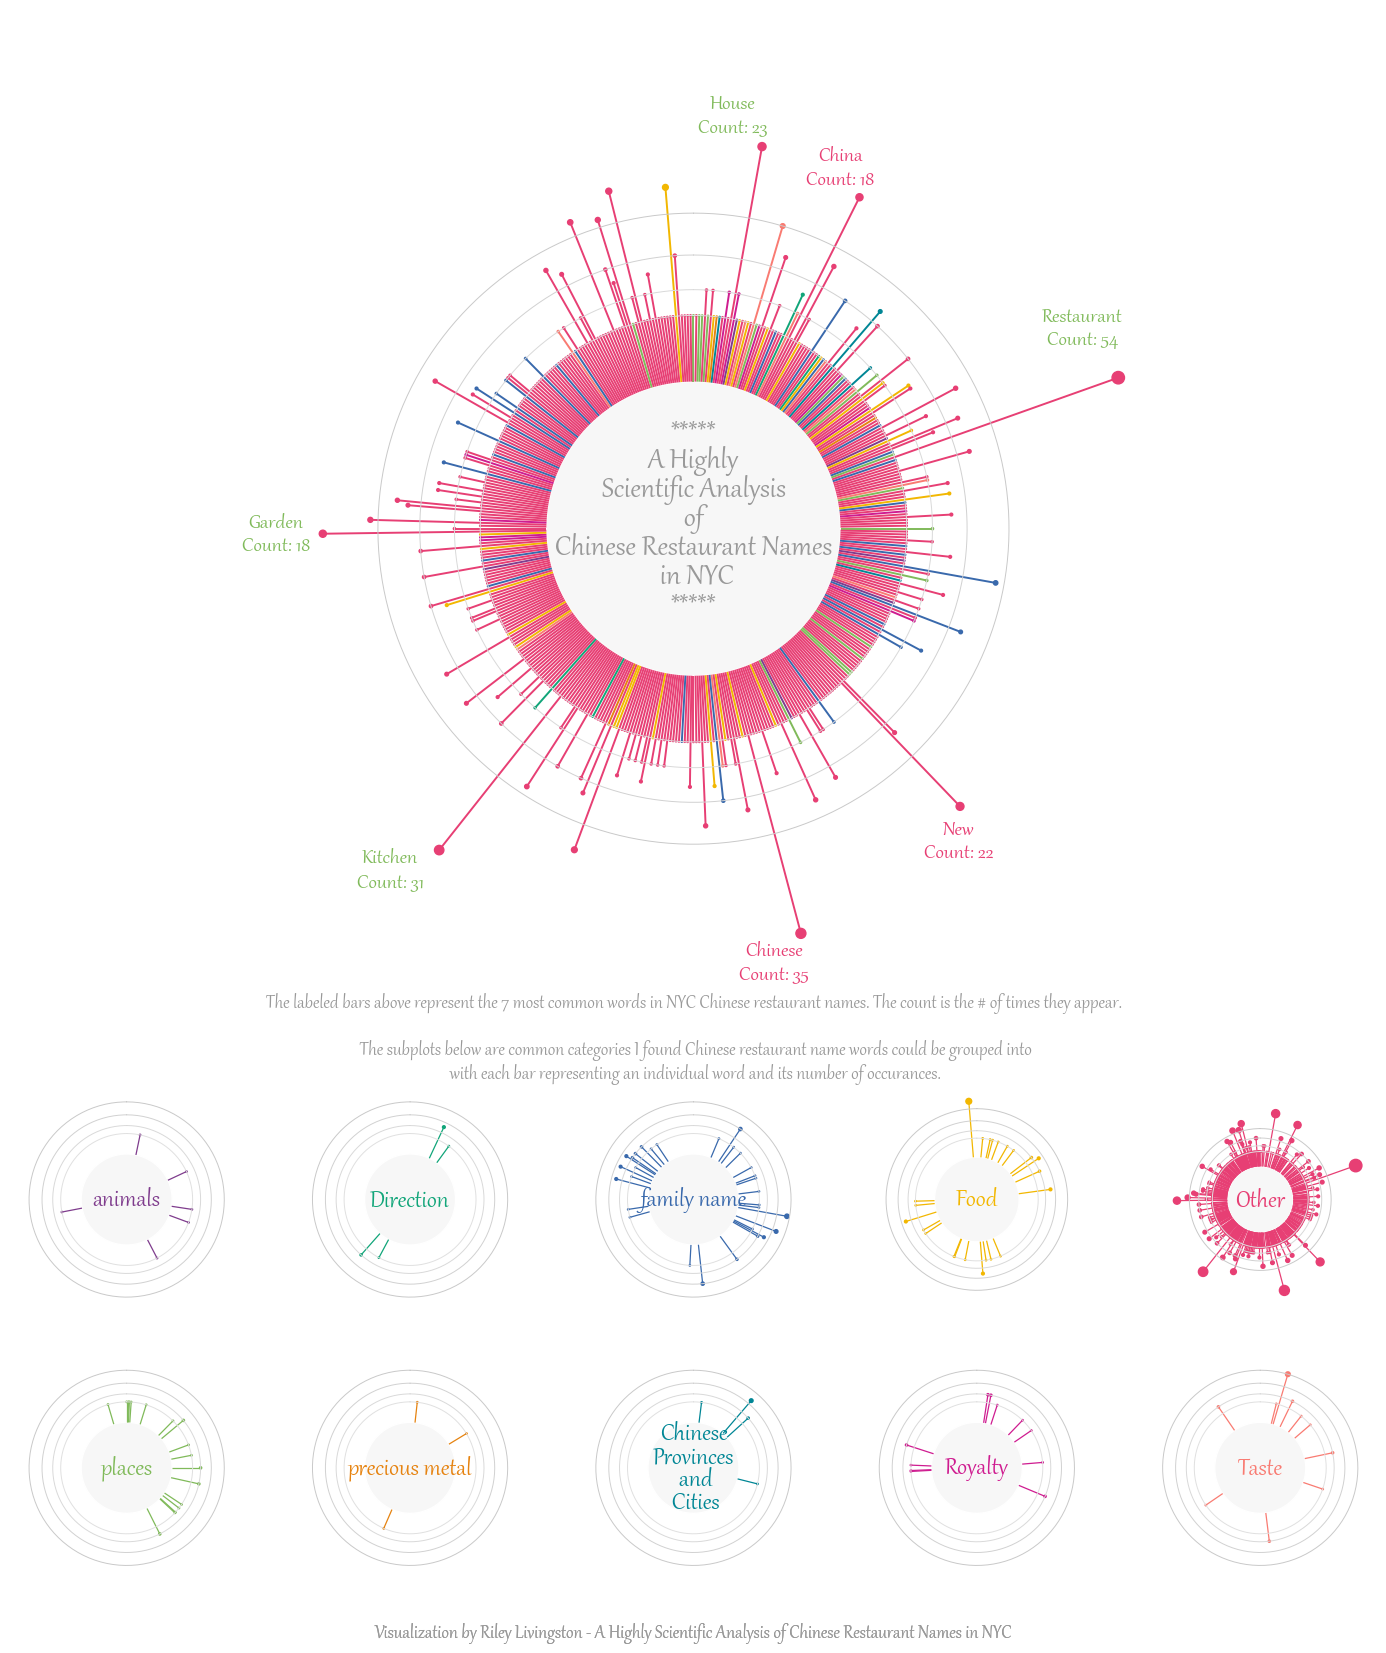

In [477]:
# Note these have changed because we iterate on rows 
# 4 and 5 (fifth and sixth, respectively)
slices = [(i + 4, j) for i in range(2) for j in range(5)]

for category, label, idx_ax in zip(CATEGORIES, LABELS, slices):
    ax = axes[idx_ax]
    idx = word_count_df.index[word_count_df["category"] == category].tolist()
    
    angles = ANGLES[idx]
    heights = HEIGHTS[idx]
    colors = COLORS[idx]
    
    circular_plot(angles, heights, colors, 0.9, ax)
    
    ax.text(
        x=0.5, y=0.5, s=label, color=colors[0], va="center", ha="center",
        ma="center", fontfamily="Gabriola", fontsize=20, fontweight="bold",
        linespacing=0.87, transform=ax.transAxes
    )
fig.text(
    x=0.5, y=0.339, s="The labeled bars above represent the 7 most common words in NYC Chinese restaurant names. The count is the # of times they appear.\n\n The subplots below are common categories I found Chinese restaurant name words could be grouped into\n with each bar representing an individual word and its number of occurances.",
    color=GREY60, fontsize=15, ha="center", fontfamily="Gabriola", fontweight="bold")

fig.text(
    x=0.5, y=0.02, s="Visualization by Riley Livingston - A Highly Scientific Analysis of Chinese Restaurant Names in NYC",
    color=GREY60, fontsize=15, ha="center", fontfamily="Gabriola", fontweight="bold"
)

fig.savefig("circular_lollipop.png", dpi=300)
fig

### Donut Chart

In [478]:
common_word_list = ['Restaurant', 'Kitchen',  'Chinese', 'China', 'House']

In [479]:
restaurant_kitchen = word_count_df[word_count_df['word'].isin(common_word_list)]


In [480]:
temp_df = pd.DataFrame({'index': [9],
                        'word': ['Other'],
                        'percent_of_restaurants': [1-(0.088372 + .079070 + .060465 + .060465+  .041860 +  .004651)],
                        'category': ['other']})

In [481]:
temp_df

index   word  percent_of_restaurants category
0      9  Other                0.665117    other

In [482]:
restaurant_kitchen = restaurant_kitchen.append(temp_df, ignore_index=True)

C:\Users\riley\AppData\Local\Temp\ipykernel_15020\1571482830.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [483]:
word_count_df.sort_values(by='count', ascending=False).head(8)

level_0  index        word  count  percent_of_words  \
0        0      0  Restaurant     54          0.055215   
1        1      1     Chinese     35          0.035787   
2        2      2     Kitchen     31          0.031697   
3        3      3       House     23          0.023517   
4        4      4         New     22          0.022495   
5        5      5      Garden     18          0.018405   
6        6      6       China     18          0.018405   
7        7      7      Noodle     13          0.013292   

   percent_of_restaurants category  rank  
0                0.146341   places     1  
1                0.094851    other     2  
2                0.084011   places     3  
3                0.062331   places     4  
4                0.059621    other     5  
5                0.048780   places     6  
6                0.048780    other     6  
7                0.035230     food     8

In [484]:
restaurant_kitchen=restaurant_kitchen.sort_values(by='percent_of_restaurants', ascending=False)

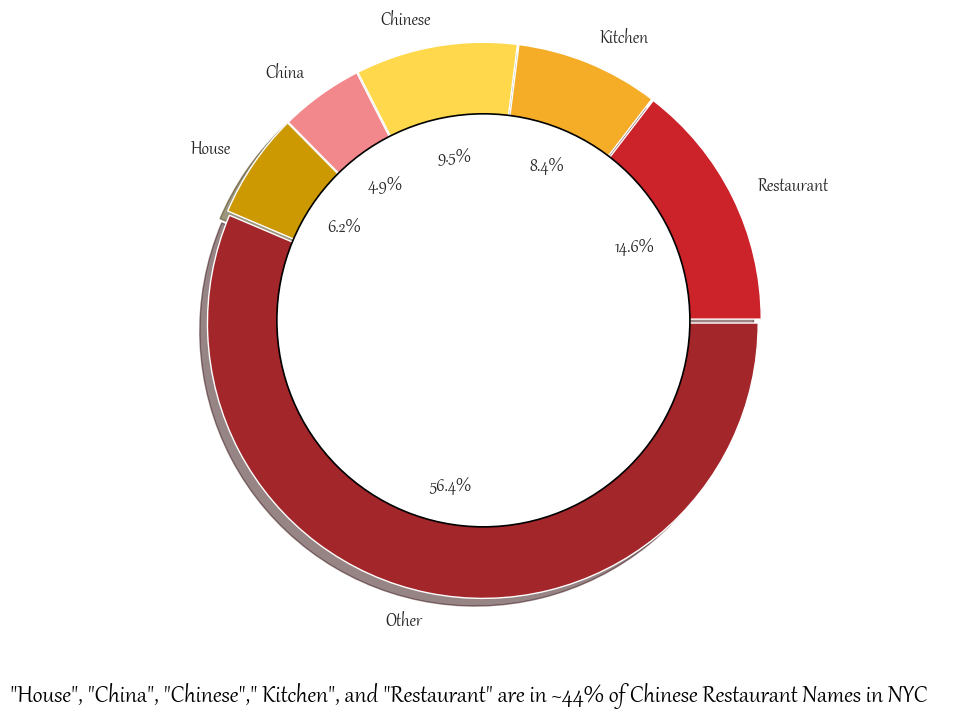

In [485]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 15})

plt.rcParams["font.family"] = 'Gabriola'



# The slices will be ordered and plotted counter-clockwise.
labels = 'Restaurant', 'Kitchen',  'Chinese', 'China', 'House', 'Other'
sizes = [14.6, 8.4, 9.5, 4.9, 6.2, 56.4]
colors = ["#cc232a", "#f5ac27", "#ffd84b", "#f2888b", "#cc9902", "#a3262a"]
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.2)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal') 
fig.text(x=0.5, y=0.02, s='"House", "China", "Chinese"," Kitchen", and "Restaurant" are in ~44% of Chinese Restaurant Names in NYC',
    color='black', fontsize=20, ha="center", fontfamily="Gabriola", fontweight="bold")

fig.savefig("donut.png", dpi=300)

### Choropleth Map

In [486]:
china_provinces_df1 = word_count_df[word_count_df['word'].isin(['Hunan', 'Shanghai', "Sichuan", 'Beijing'])]

In [487]:
china_provinces_df1

level_0  index      word  count  percent_of_words  \
9          9      9  Shanghai     12          0.012270   
52        52     57   Beijing      3          0.003067   
61        61     66     Hunan      3          0.003067   
133      133    141   Sichuan      2          0.002045   

     percent_of_restaurants  category  rank  
9                   0.03252  province     9  
52                  0.00813  province    62  
61                  0.00813  province    62  
133                 0.00542  province   105

In [488]:
import json

In [489]:
chinese_provinces = json.load(open("C:\\Users\\riley\\OneDrive\\Desktop\\Data Portfolio Project\\a_highly_scientific_analysis_of_chinese_restaurant_names\\gadm36_CHN_1.json"))

In [490]:
chinese_provinces

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[116.12962341, 29.82485008],
      [116.05905914, 30.20925522],
      [115.76095581, 30.67427635],
      [116.0011673, 30.9495163],
      [115.87502289, 31.14422417],
      [115.55741119, 31.15970039],
      [115.36437225, 31.40503883],
      [115.49180603, 31.67566681],
      [115.90435791, 31.82001877],
      [115.93076324, 32.16601944],
      [115.82931519, 32.52696991],
      [115.61597443, 32.41099548],
      [115.19152832, 32.5904808],
      [115.13391113, 32.89952469],
      [115.28569031, 33.13598633],
      [115.40752411, 33.55921555],
      [115.63195038, 33.58683777],
      [115.54928589, 33.89166641],
      [115.7220459, 34.08029938],
      [116.14985657, 33.71124649],
      [116.63354492, 33.98846436],
      [116.51093292, 34.29732513],
      [116.17365265, 34.43161392],
      [116.18591309, 34.57946777],
      [116.36860657, 34.64086914],
      [116.8230

In [491]:
chinese_provinces['features'][0].keys()

dict_keys(['type', 'geometry', 'properties'])

In [492]:
chinese_provinces

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[116.12962341, 29.82485008],
      [116.05905914, 30.20925522],
      [115.76095581, 30.67427635],
      [116.0011673, 30.9495163],
      [115.87502289, 31.14422417],
      [115.55741119, 31.15970039],
      [115.36437225, 31.40503883],
      [115.49180603, 31.67566681],
      [115.90435791, 31.82001877],
      [115.93076324, 32.16601944],
      [115.82931519, 32.52696991],
      [115.61597443, 32.41099548],
      [115.19152832, 32.5904808],
      [115.13391113, 32.89952469],
      [115.28569031, 33.13598633],
      [115.40752411, 33.55921555],
      [115.63195038, 33.58683777],
      [115.54928589, 33.89166641],
      [115.7220459, 34.08029938],
      [116.14985657, 33.71124649],
      [116.63354492, 33.98846436],
      [116.51093292, 34.29732513],
      [116.17365265, 34.43161392],
      [116.18591309, 34.57946777],
      [116.36860657, 34.64086914],
      [116.8230

In [493]:
chinese_provinces['features'][0]['properties']

{'GID_0': 'CHN',
 'NAME_0': 'China',
 'GID_1': 'CHN.1_1',
 'NAME_1': 'Anhui',
 'VARNAME_1': 'Ānhuī',
 'NL_NAME_1': '安徽|安徽',
 'TYPE_1': 'Shěng',
 'ENGTYPE_1': 'Province',
 'CC_1': '',
 'HASC_1': 'CN.AH'}

In [494]:
province_id_map = {}
for feature in chinese_provinces['features']:
    feature['id'] = feature['properties']['NAME_1']
    province_id_map[feature['properties']['NAME_1']] =feature['id']

In [495]:
province_id_map

{'Anhui': 'Anhui',
 'Beijing': 'Beijing',
 'Chongqing': 'Chongqing',
 'Fujian': 'Fujian',
 'Gansu': 'Gansu',
 'Guangdong': 'Guangdong',
 'Guangxi': 'Guangxi',
 'Guizhou': 'Guizhou',
 'Hainan': 'Hainan',
 'Hebei': 'Hebei',
 'Heilongjiang': 'Heilongjiang',
 'Henan': 'Henan',
 'Hubei': 'Hubei',
 'Hunan': 'Hunan',
 'Jiangsu': 'Jiangsu',
 'Jiangxi': 'Jiangxi',
 'Jilin': 'Jilin',
 'Liaoning': 'Liaoning',
 'Nei Mongol': 'Nei Mongol',
 'Ningxia Hui': 'Ningxia Hui',
 'Qinghai': 'Qinghai',
 'Shaanxi': 'Shaanxi',
 'Shandong': 'Shandong',
 'Shanghai': 'Shanghai',
 'Shanxi': 'Shanxi',
 'Sichuan': 'Sichuan',
 'Tianjin': 'Tianjin',
 'Xinjiang Uygur': 'Xinjiang Uygur',
 'Xizang': 'Xizang',
 'Yunnan': 'Yunnan',
 'Zhejiang': 'Zhejiang'}

In [496]:
china_provinces_df1['id'] = china_provinces_df1['word'].apply(lambda x:province_id_map[x])

C:\Users\riley\AppData\Local\Temp\ipykernel_15020\1203971792.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [497]:
china_provinces_df1

level_0  index      word  count  percent_of_words  \
9          9      9  Shanghai     12          0.012270   
52        52     57   Beijing      3          0.003067   
61        61     66     Hunan      3          0.003067   
133      133    141   Sichuan      2          0.002045   

     percent_of_restaurants  category  rank        id  
9                   0.03252  province     9  Shanghai  
52                  0.00813  province    62   Beijing  
61                  0.00813  province    62     Hunan  
133                 0.00542  province   105   Sichuan

In [498]:
chinese_provinces_df = pd.DataFrame(chinese_provinces_list, columns=['id'])

In [499]:
china_provinces_df1= pd.merge(chinese_provinces_df, china_provinces_df1, on='id', how='left')

In [500]:
china_provinces_df1['word'] = china_provinces_df1['id']

In [501]:
china_provinces_df1 = china_provinces_df1.fillna(0)

In [502]:
import plotly.express as px
import plotly.io as pio

In [503]:
choropleth_df = df_unique[df_unique['restaurant_names'].str.contains('|'.join(chinese_provinces_list), regex=True)]

In [504]:
pio.renderers.default = ('browser')

In [505]:
fig = px.choropleth(china_provinces_df1, 
                        locations= 'word', 
                        fitbounds='locations',
                        geojson=chinese_provinces, color='count', 
                        hover_data=['count'],
                        color_continuous_scale = px.colors.sequential.OrRd,

                        
                        )
fig.update_layout(title='Provinces in NYC Chinese Restaurant Names', font_family='Gabriola', font_size=16.5)
fig.update_layout(title={
        'text': "Provinces in NYC Chinese Restaurant Names",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
                  
fig.update_geos(fitbounds='locations', visible=False)



fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=7,
    lenmode="pixels", len=110,
    yanchor="top", y=0.75,
    ticks="outside",
    dtick=4, 
    title='Count'
))
fig.show()
fig.write_html("plotly_choropleth.html")


In [506]:
df_unique.shape

(369, 1)

### Barplots

In [507]:
word_count_df['category'].value_counts()


other             352
family name        30
food               23
places             17
royalty            11
tastes             10
animals             6
province            4
direction           4
precious metal      3
Name: category, dtype: int64

C:\Users\riley\AppData\Local\Temp\ipykernel_15020\2874181201.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\riley\AppData\Local\Temp\ipykernel_15020\2874181201.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\riley\AppData\Local\Temp\ipykernel_15020\2874181201.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\riley\AppData\Local\Temp\ipykernel_15020\2874181201.py:39: UserWarning:

FixedFormatter should only be used together with FixedLocator



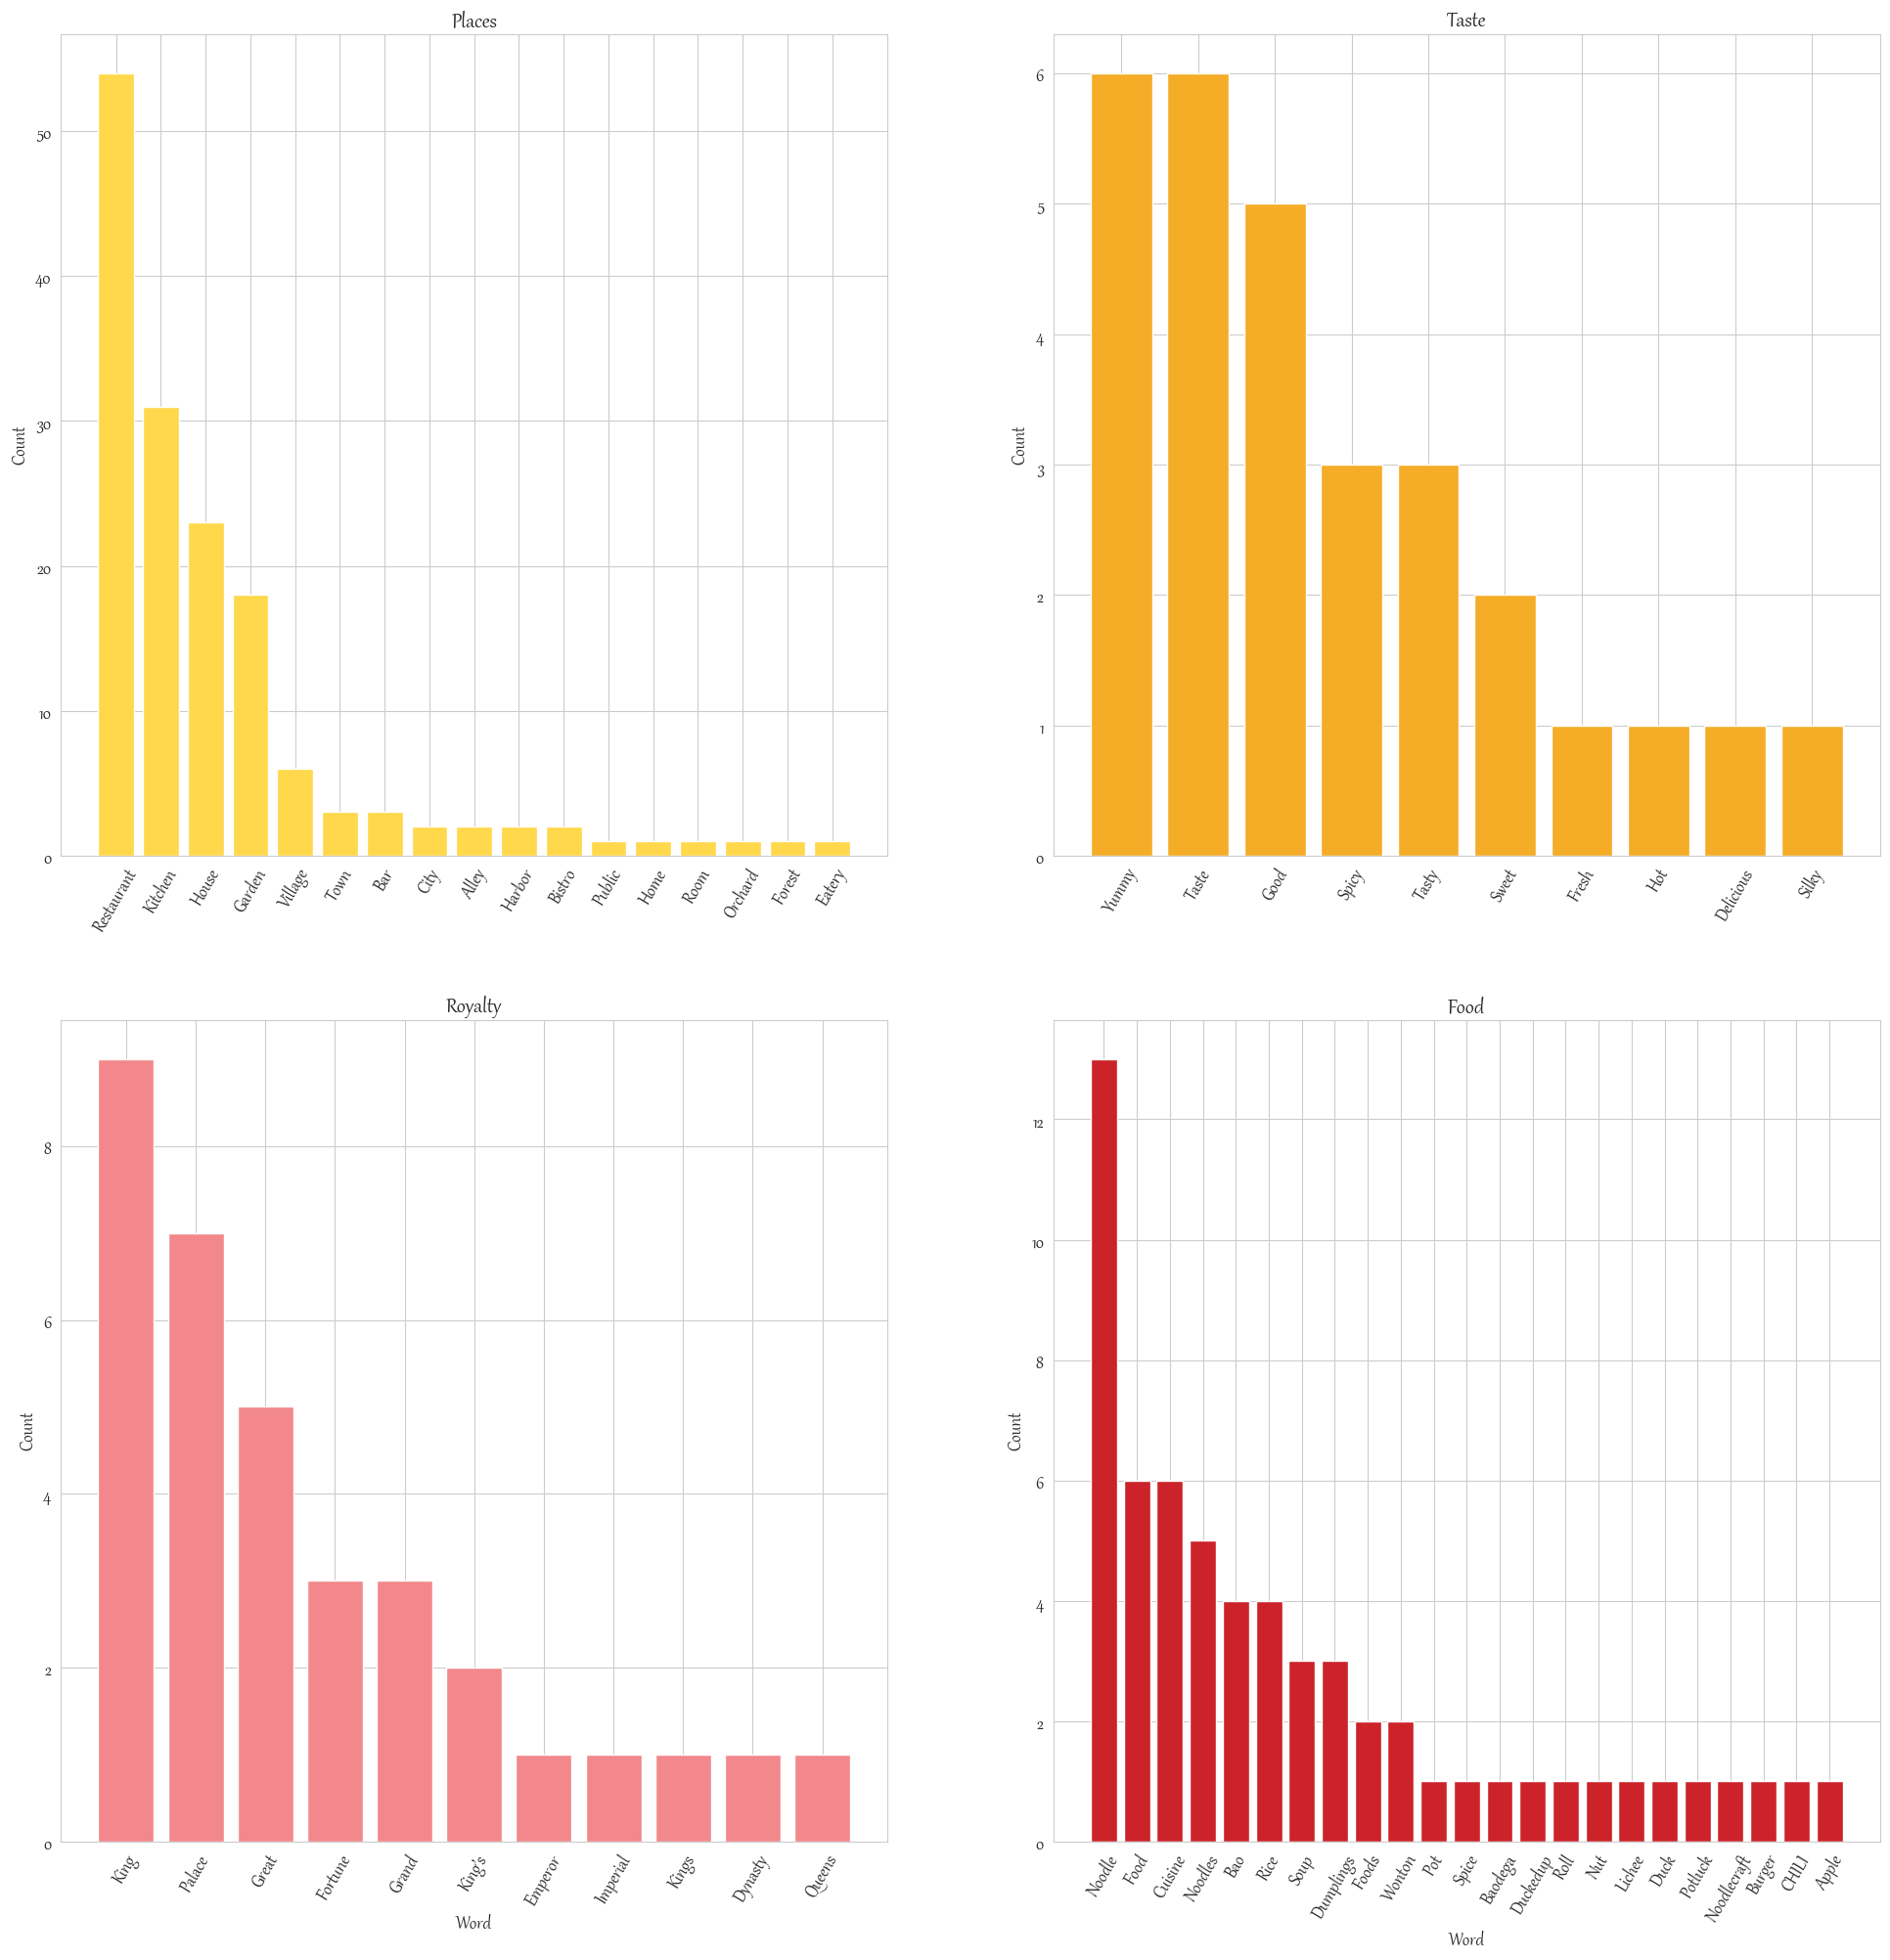

In [508]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(24,24))

# plot data for place
mask = word_count_df['category'] =='places'
df_places = word_count_df[mask]

ax[0, 0].bar(df_places['word'],df_places['count'], color="#FFD84B")
ax[0, 0].set_title('Places')
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_xticklabels(df_places['word'], rotation=60)

# plot data for taste
mask2 = word_count_df['category'] =='tastes'
df_taste = word_count_df[mask2]
ax[0, 1].bar(df_taste['word'],df_taste['count'], color="#F5AC27")
ax[0, 1].set_title('Taste')
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel('Count')
ax[0, 1].set_xticklabels(df_taste['word'], rotation=60)

#plot the data for royalty
mask3 = word_count_df['category'] =='royalty'
df_royalty = word_count_df[mask3]
ax[1, 0].bar(df_royalty['word'],df_royalty['count'], color="#F2888B")
ax[1, 0].set_title('Royalty')
ax[1, 0].set_xlabel('Word')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_xticklabels(df_royalty['word'], rotation=60)


#plot the data for food
mask4 = word_count_df['category'] == 'food'
df_food = word_count_df[mask4]
ax[1, 1].bar(df_food['word'],df_food['count'], color="#CC232A")
ax[1, 1].set_title('Food')
ax[1, 1].set_xlabel('Word')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_xticklabels(df_food['word'], rotation=60)

plt.show()

In [509]:
temp_category_list = ['places', 'tastes', 'royalty', 'precious metal', 'food', 'animals']

In [510]:
px_categories = word_count_df[word_count_df['category'].isin(temp_category_list)]

In [511]:
fig = px.bar(px_categories, 
             x='count', 
             y='word', 
             title='Describing Taste', 
             color='category', color_discrete_map={'places': '#A3262A', 
                                                   'food': '#F2888B', 
                                                   'tastes': '#F5AC27', 
                                                   'animals': '#FFD84B' , 
                                                   'royalty': '#4c8c4c', 
                                                   'precious metal': '#a1aaa8', 'direction': '#97c1df' })
fig.update_layout(title='Word themes in NYC Chinese Restaurant Names', font_family='Gabriola', font_size=14)
fig.update_layout(title={
        'text': "Word Themes in NYC Chinese Restaurant Names",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()
fig.write_html("plotly_bar.html")


### Sunburst Chart

In [512]:
word_count_df_filt = word_count_df[word_count_df['category']=='family name']

In [513]:
word_count_df_filt = word_count_df[word_count_df['category'].isin(temp_category_list)]

In [514]:
word_count_df_filt = word_count_df[word_count_df['category']=='family name']

In [515]:
word_count_df_filt

level_0  index   word  count  percent_of_words  percent_of_restaurants  \
29        29     34   Hong      5          0.005112                 0.01355   
43        43     48   Chen      4          0.004090                 0.01084   
48        48     53   Wang      3          0.003067                 0.00813   
58        58     63    Lin      3          0.003067                 0.00813   
78        78     83     Ma      2          0.002045                 0.00542   
88        88     93     Li      2          0.002045                 0.00542   
91        91     96   Zhou      2          0.002045                 0.00542   
106      106    112    Han      2          0.002045                 0.00542   
121      121    129    Sun      2          0.002045                 0.00542   
124      124    132  Chang      2          0.002045                 0.00542   
128      128    136  Huang      2          0.002045                 0.00542   
142      143    151     Mo      1          0.001022                 0.00271   
149      150    159     Ji      1          0.001022                 0.00271   
151      152    161    Shi      1          0.001022                 0.00271   
153      154    163     Wu      1          0.001022                 0.00271   
184      185    195    Jia      1          0.001022                 0.00271   
222      223    233    Tan      1          0.001022                 0.00271   
234      235    245  Zhang      1          0.001022                 0.00271   
325      330    341     Ye      1          0.001022                 0.00271   
334      339    350   Fang      1          0.001022                 0.00271   
364      371    384    Wei      1          0.001022                 0.00271   
371      378    391    Lou      1          0.001022                 0.00271   
376      384    397  Cheng      1          0.001022                 0.00271   
382      390    404   Tang      1          0.001022                 0.00271   
387      395    409   Yuan      1          0.001022                 0.00271   
389      397    411  Liang      1          0.001022                 0.00271   
394      402    416     Du      1          0.001022                 0.00271   
403      411    426   Shen      1          0.001022                 0.00271   
409      417    432   Yang      1          0.001022                 0.00271   
417      425    440  Jiang      1          0.001022                 0.00271   

        category  rank  
29   family name    30  
43   family name    42  
48   family name    62  
58   family name    62  
78   family name   105  
88   family name   105  
91   family name   105  
106  family name   105  
121  family name   105  
124  family name   105  
128  family name   105  
142  family name   297  
149  family name   297  
151  family name   297  
153  family name   297  
184  family name   297  
222  family name   297  
234  family name   297  
325  family name   297  
334  family name   297  
364  family name   297  
371  family name   297  
376  family name   297  
382  family name   297  
387  family name   297  
389  family name   297  
394  family name   297  
403  family name   297  
409  family name   297  
417  family name   297

In [516]:
fig = px.sunburst(
    word_count_df_filt, 
    path=['category', 'word'],
    values='count',
    color='count', 
    color_continuous_scale= 'Burgyl',
hover_data=['count'])

fig.update_layout(title='Word themes in NYC Chinese Restaurant Names', font_family='Gabriola', font_size=14)
fig.update_layout(title=('Family Names in NYC Chinese Restaurants'))
fig.update_layout(title={
        'text': 'Family Names in NYC Chinese Restaurant Names',
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=3.5,
    lenmode="pixels", len=100,
    yanchor="top", y=0.85,
    ticks="outside",
    dtick = 6,
    title='Count'))

fig.update_traces(hovertemplate=None)


fig.show()
fig.write_html("family_name_sunburst.html")

### Restaurant Names Viz

In [517]:
temp_restaurant_names_df = df_unique[df_unique['restaurant_names'].str.contains('|'.join(chinese_provinces_list),regex=True)]
temp_restaurant_names_df

restaurant_names
20                     Grand Sichuan
21             Shanghai Zhen Gong Fu
28                    Joe’s Shanghai
61   Beijing Chinese & Japanese Food
84              Memories of Shanghai
121           Beijing Dumpling House
132                 Tri Dim Shanghai
148                    Hunan Delight
197              Shanghai You Garden
236       M Shanghai Bistro & Garden
243               Hunan K Restaurant
278                    Beijing House
36                       Shanghai 21
63             Tri Dim Shanghai West
136                     Shanghai Lee
159                    Shanghai Mong
213    Steam - Shanghai Asian Fusion
241                   Tipsy Shanghai
267                    Hunan Village
280                 The Best Sichuan

### Dichotomy barplots

Text(0, 0.5, 'count')

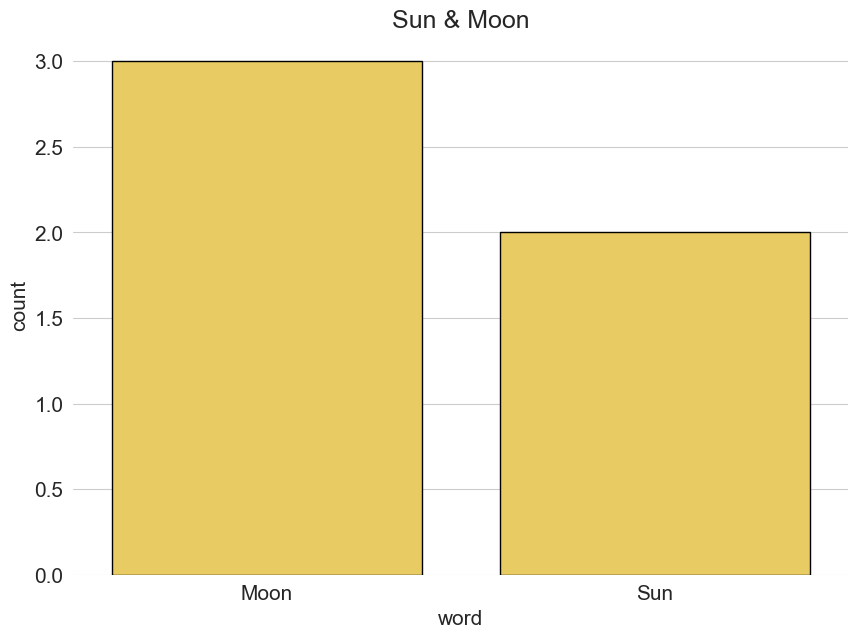

In [518]:
sun_moon_df = word_count_df[word_count_df['word'].isin(sun_moon)]
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.barplot(data=sun_moon_df, x='word',y='count', color="#FFD84B", edgecolor='black')
sns.despine(left=True, bottom=True)
plt.title('Sun & Moon')
plt.xlabel('word')
plt.ylabel('count')


Text(0, 0.5, 'count')

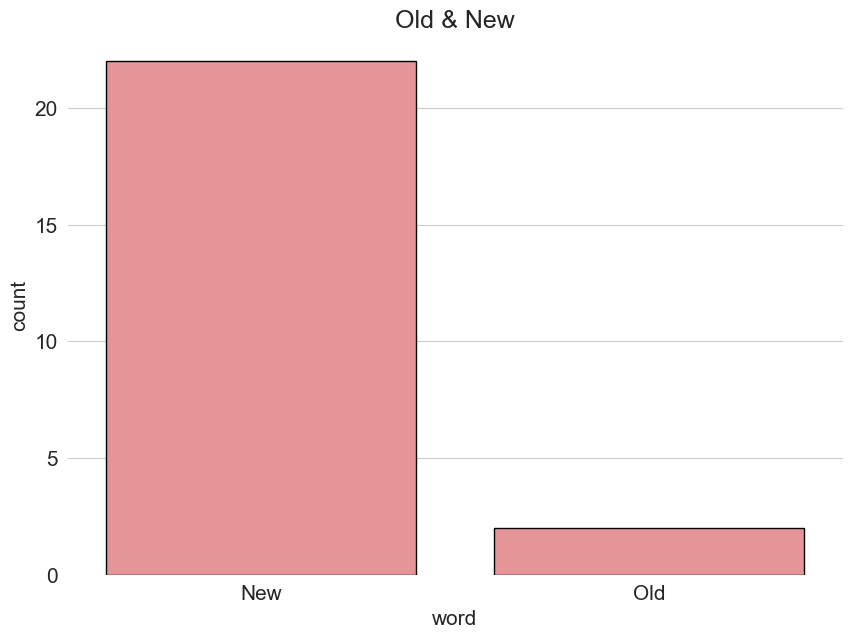

In [519]:
old_new_df = word_count_df[word_count_df['word'].isin(old_new)]
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.barplot(data=old_new_df, x='word',y='count', color="#F2888B", edgecolor='black')
sns.despine(left=True, bottom=True)
plt.title( 'Old & New')
plt.xlabel('word')
plt.ylabel('count')

In [520]:
df_unique[df_unique['restaurant_names'].str.contains('|'.join(sun_moon), regex=True)]

restaurant_names
55                          Mr. Sun
115             Moon Palace Kitchen
292              Sun Wah Restaurant
115         Spicy Moon East Village
217                        New Moon
283  New Sunrise Chinese Restaurant

In [521]:
df_unique[df_unique['restaurant_names'].str.contains('|'.join(old_new), regex=True)]

restaurant_names
38                   Old Captain Dumpling
87                       New Sze’s Garden
122                     Jaew Hon New York
149                           New Cottage
152                New Sweet Rice Kitchen
166         New Hardee Chinese Restaurant
179         New China Wok Chinese Kitchen
187                            New Peking
203                 New Fu Run Restaurant
238                       New Golden Star
266                             New Apolo
284                          New Lin Wang
297                  New China Restaurant
307          New Golden Dragon Restaurant
309                             New No. 1
34            New Chin Chin Wu Restaurant
59                      New Double Dragon
146                   New Golden Fountain
192                 Chef Tan Newport 蜀湘门第
216                             Old Xi’an
217                              New Moon
245        New De Xing Chinese Restaurant
249  New Chinatown Restaurant of New York
283        New Sunrise Chinese Restaurant

In [522]:
df_unique[df_unique['restaurant_names']=='LN1380']

restaurant_names
289           LN1380